In [1]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
import os # 导入os工具

In [2]:
print(os.listdir("../input/stanford-dogs-dataset/images/Images"))

['n02091635-otterhound', 'n02102318-cocker_spaniel', 'n02101388-Brittany_spaniel', 'n02088094-Afghan_hound', 'n02085936-Maltese_dog', 'n02104365-schipperke', 'n02100877-Irish_setter', 'n02086079-Pekinese', 'n02099601-golden_retriever', 'n02100583-vizsla', 'n02102177-Welsh_springer_spaniel', 'n02093256-Staffordshire_bullterrier', 'n02106166-Border_collie', 'n02093991-Irish_terrier', 'n02109961-Eskimo_dog', 'n02110958-pug', 'n02105412-kelpie', 'n02094433-Yorkshire_terrier', 'n02097474-Tibetan_terrier', 'n02089867-Walker_hound', 'n02110627-affenpinscher', 'n02113186-Cardigan', 'n02102040-English_springer', 'n02089973-English_foxhound', 'n02098286-West_Highland_white_terrier', 'n02095570-Lakeland_terrier', 'n02087394-Rhodesian_ridgeback', 'n02101006-Gordon_setter', 'n02098413-Lhasa', 'n02099429-curly-coated_retriever', 'n02088364-beagle', 'n02108551-Tibetan_mastiff', 'n02102480-Sussex_spaniel', 'n02109525-Saint_Bernard', 'n02087046-toy_terrier', 'n02113799-standard_poodle', 'n02107683-Bern

In [3]:
# 本示例咱只处理这10种狗吧
dir = '../input/stanford-dogs-dataset/images/Images/' 
chihuahua_dir = dir+'n02085620-Chihuahua' #吉娃娃
japanese_spaniel_dir = dir+'n02085782-Japanese_spaniel' #日本狆
maltese_dir = dir+'n02085936-Maltese_dog' #马尔济斯犬
pekinese_dir = dir+'n02086079-Pekinese' #北京狮子狗
shitzu_dir = dir+'n02086240-Shih-Tzu' #西施犬
blenheim_spaniel_dir = dir+'n02086646-Blenheim_spaniel' #英国可卡犬
papillon_dir = dir+'n02086910-papillon' #蝴蝶犬
toy_terrier_dir = dir+'n02087046-toy_terrier' #玩具猎狐梗
afghan_hound_dir = dir+'n02088094-Afghan_hound' #阿富汗猎犬
basset_dir = dir+'n02088238-basset' #巴吉度猎犬

In [4]:
import cv2 # 导入Open CV工具箱
X = []
y_label = []
imgsize = 150

In [5]:
# 定义一个函数读入狗狗图片
def training_data(label,data_dir):
    print ("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        X.append(np.array(img))
        y_label.append(str(label)) 

In [6]:
# 读入10个目录中的狗狗图片
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

正在读入： ../input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua
正在读入： ../input/stanford-dogs-dataset/images/Images/n02085782-Japanese_spaniel
正在读入： ../input/stanford-dogs-dataset/images/Images/n02085936-Maltese_dog
正在读入： ../input/stanford-dogs-dataset/images/Images/n02086079-Pekinese
正在读入： ../input/stanford-dogs-dataset/images/Images/n02086240-Shih-Tzu
正在读入： ../input/stanford-dogs-dataset/images/Images/n02086646-Blenheim_spaniel
正在读入： ../input/stanford-dogs-dataset/images/Images/n02086910-papillon
正在读入： ../input/stanford-dogs-dataset/images/Images/n02087046-toy_terrier
正在读入： ../input/stanford-dogs-dataset/images/Images/n02088094-Afghan_hound
正在读入： ../input/stanford-dogs-dataset/images/Images/n02088238-basset


In [7]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码工具
from tensorflow.keras.utils import to_categorical # 导入One-hot编码工具

2024-02-27 03:20:18.274736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 03:20:18.274836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 03:20:18.453449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码

In [9]:
y = to_categorical(y,10)

In [10]:
X = np.array(X) # 将X从列表转换为张量数组
X = X/255 # 将X张量归一化

In [11]:
print ('X张量的形状：', X.shape)
print ('X张量的第一个数据：', X[0])

X张量的形状： (1922, 150, 150, 3)
X张量的第一个数据： [[[0.45098039 0.43529412 0.53333333]
  [0.45098039 0.43529412 0.53333333]
  [0.45098039 0.43529412 0.53333333]
  ...
  [0.5372549  0.51372549 0.60392157]
  [0.50588235 0.49411765 0.58431373]
  [0.46666667 0.48627451 0.56862745]]

 [[0.45882353 0.44313725 0.54117647]
  [0.45882353 0.44313725 0.54117647]
  [0.45882353 0.44313725 0.54117647]
  ...
  [0.54901961 0.52156863 0.61176471]
  [0.50980392 0.50196078 0.58823529]
  [0.4745098  0.49019608 0.57254902]]

 [[0.45490196 0.43921569 0.5372549 ]
  [0.45490196 0.43921569 0.5372549 ]
  [0.45490196 0.43921569 0.5372549 ]
  ...
  [0.55686275 0.5254902  0.61568627]
  [0.51372549 0.49803922 0.58431373]
  [0.48627451 0.49019608 0.57254902]]

 ...

 [[0.5254902  0.48235294 0.61176471]
  [0.5254902  0.48235294 0.61176471]
  [0.5254902  0.48235294 0.61176471]
  ...
  [0.56862745 0.50588235 0.64705882]
  [0.53333333 0.49019608 0.62352941]
  [0.49803922 0.48235294 0.60392157]]

 [[0.5254902  0.48235294 0.61176471

In [12]:
print ('y张量的形状：', y.shape)
print ('y张量的第一个数据：', y[0].shape)

y张量的形状： (1922, 10)
y张量的第一个数据： (10,)


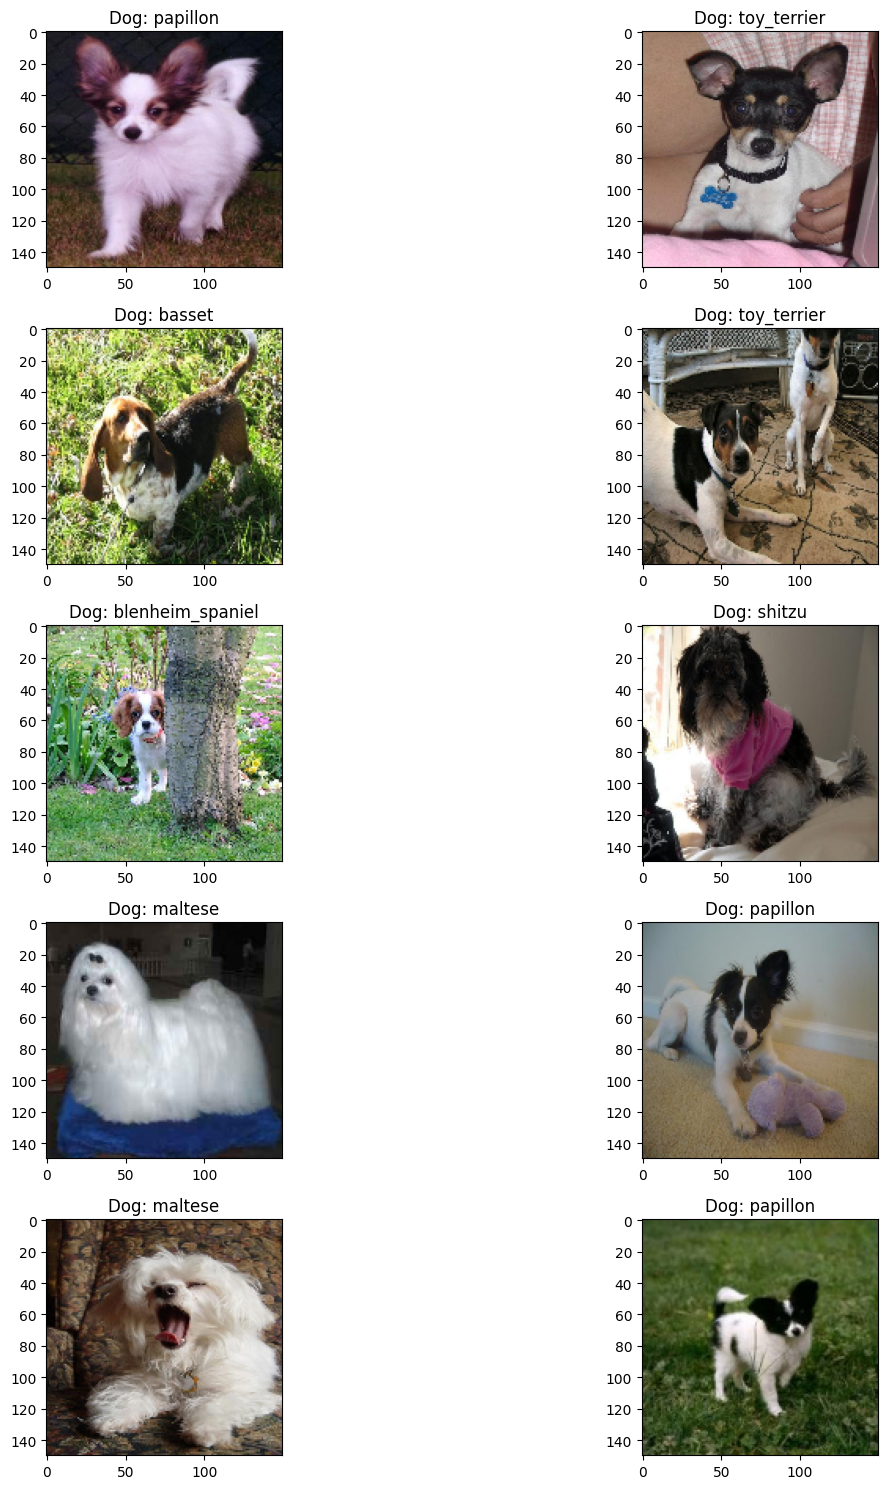

In [13]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张可爱的狗狗图片吧
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        r = rdm.randint(0,len(X))
        X[r] = X[r][...,::-1] #将图像通道从BGR调整为RGB，防止色彩失真
        ax[i,j].imshow(X[r])
        ax[i,j].set_title('Dog: '+y_label[r])
plt.tight_layout()

In [14]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=0)

In [15]:
# 定义一个数据增强器，并设定各种增强选项
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
augs_gen = ImageDataGenerator(
           featurewise_center=False,
           samplewise_center=False,         
           featurewise_std_normalization=False,          
           samplewise_std_normalization=False,  
           zca_whitening=False, 
           rotation_range=10,  
           zoom_range = 0.1, 
           width_shift_range=0.2,  
           height_shift_range=0.2,
           horizontal_flip=True,  
           vertical_flip=False)

In [17]:
augs_gen.fit(X_train) # 针对训练集拟合数据增强器

In [18]:
from tensorflow.keras import layers # 导入所有层
from tensorflow.keras import models # 导入所有模型
from tensorflow.keras import optimizers # 导入优化器

In [19]:
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积
                       input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='sigmoid')) # 分类输出

In [20]:
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['accuracy']) # 评估指标

In [24]:
history = cnn.fit( # 使用fit_generator
    augs_gen.flow(X_train,y_train,batch_size=16), # 增强后的训练集
    validation_data  = (X_test,y_test), # 指定验证集
    epochs = 50,  # 指定轮次
    verbose = 1) # 指定是否显示训练过程中的信息

Epoch 1/50
97/97 [==============================] - 8s 86ms/step - loss: 2.2890 - accuracy: 0.1288 - val_loss: 2.2906 - val_accuracy: 0.1351
Epoch 2/50
97/97 [==============================] - 7s 73ms/step - loss: 2.2733 - accuracy: 0.1483 - val_loss: 2.2953 - val_accuracy: 0.1169
Epoch 3/50
97/97 [==============================] - 7s 74ms/step - loss: 2.2688 - accuracy: 0.1653 - val_loss: 2.2572 - val_accuracy: 0.1818
Epoch 4/50
97/97 [==============================] - 7s 73ms/step - loss: 2.2478 - accuracy: 0.1724 - val_loss: 2.2542 - val_accuracy: 0.2052
Epoch 5/50
97/97 [==============================] - 7s 74ms/step - loss: 2.2277 - accuracy: 0.1900 - val_loss: 2.2500 - val_accuracy: 0.1922
Epoch 6/50
97/97 [==============================] - 7s 74ms/step - loss: 2.2201 - accuracy: 0.1770 - val_loss: 2.2419 - val_accuracy: 0.1948
Epoch 7/50
97/97 [==============================] - 7s 74ms/step - loss: 2.1866 - accuracy: 0.2082 - val_loss: 2.1918 - val_accuracy: 0.2442
Epoch 8/50
97

In [25]:
def show_history(history):  # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

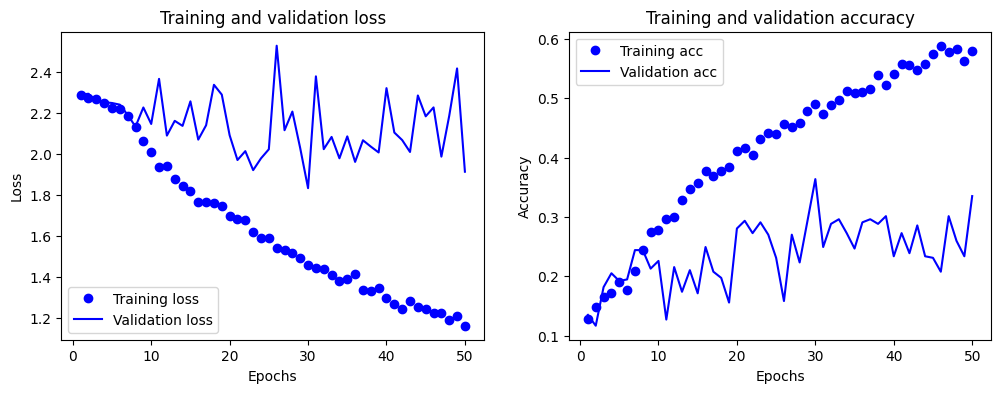

In [26]:
show_history(history)